<a href="https://colab.research.google.com/github/jananisree-a-s/OIBSIP/blob/main/Project-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset (upload CSV in Colab)
df = pd.read_csv('/content/retail_sales_dataset.csv')

# Preview data
df.head(15)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
# Dataset shape
df.shape

(1000, 9)

In [5]:
# Column names
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [6]:
# Data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
# Check missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [8]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1066624941.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [9]:
# Basic statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
stats = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Mode': df[num_cols].mode().iloc[0],
    'Std Dev': df[num_cols].std()
})

stats

,Mean,Median,Mode,Std Dev
Transaction ID,500.500,500.5,1.0,288.819436
Age,41.392,42.0,43.0,13.681430
Quantity,2.514,3.0,4.0,1.132734
Price per Unit,179.890,50.0,50.0,189.681356
Total Amount,456.000,135.0,50.0,559.997632


In [11]:
# Convert Date column to datetime
date_col = [col for col in df.columns if 'date' in col.lower()][0]
df[date_col] = pd.to_datetime(df[date_col])

# Sort by date
df = df.sort_values(by=date_col)

# Monthly sales trend
df['Month'] = df[date_col].dt.to_period('M')

monthly_sales = df.groupby('Month')[num_cols[0]].sum()

monthly_sales.head()

,Transaction ID
Month,
2023-01,36867
2023-02,37699
2023-03,34712
2023-04,42755
2023-05,53821


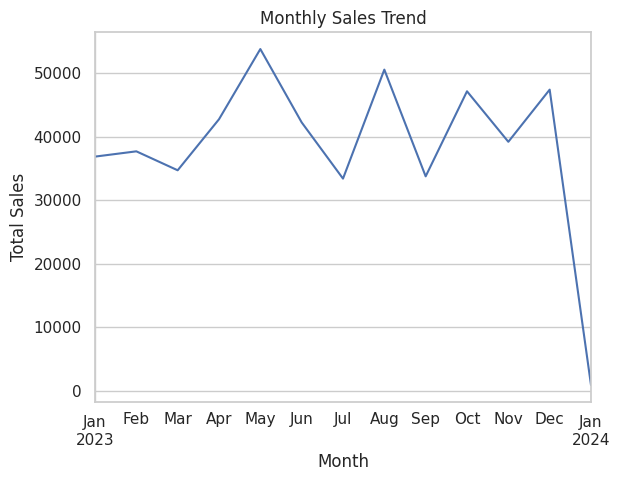

In [12]:
plt.figure()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


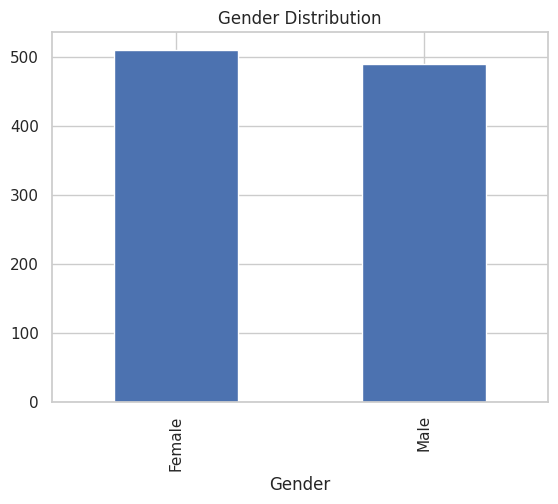

In [13]:
# Gender distribution
if 'Gender' in df.columns:
    df['Gender'].value_counts().plot(kind='bar')
    plt.title('Gender Distribution')
    plt.show()


In [15]:
if 'Customer_ID' in df.columns:
    customer_spending = df.groupby('Customer_ID')[num_cols[0]].sum().sort_values(ascending=False)
    customer_spending.head(10)


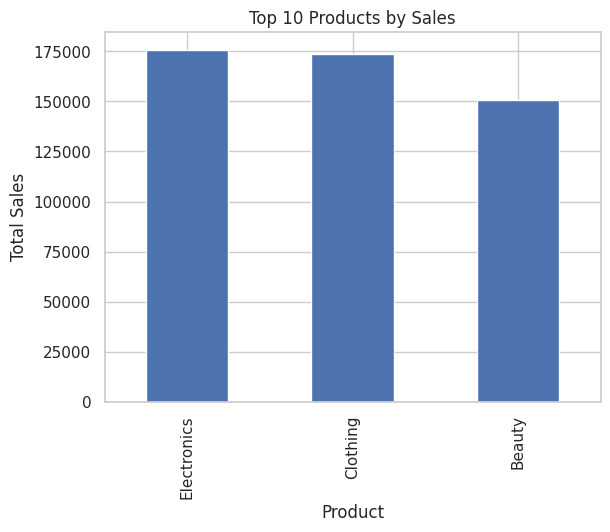

In [16]:
product_col = [col for col in df.columns if 'product' in col.lower()][0]

product_sales = df.groupby(product_col)[num_cols[0]].sum().sort_values(ascending=False)

# Bar chart
plt.figure()
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


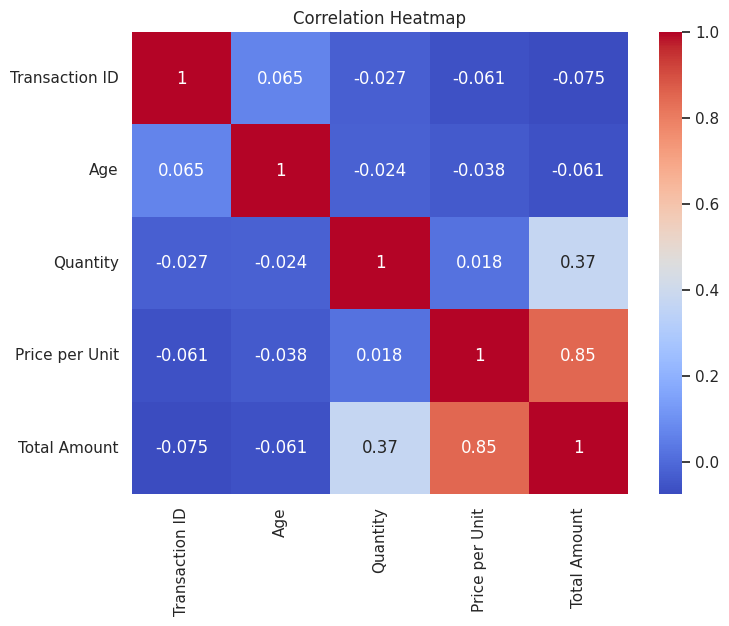

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()